# <span style="color:darkorange"> Exercises 08 (NSL) </span>
# <span style="color:darkorange"> 08.1: Evaluation of energy functional $E\left[\Psi_T\right]$ </span>

By definition of <font color="darkorange">ground state</font>  $\Psi_0$, for any trial state $\Psi_T=\Psi^{(\underline{a})}_T$ the average energy is greater than or equal to that of the ground state. The idea behind the variational principle is attempting to <font color="darkorange">approximate the solution</font> in the best way possible, by <font color="darkorange">tuning some parameters</font> $\underline{a}=\left(a_1,a_2,...,a_n\right)$ so that the average energy of the trial function <font color="darkorange">approaches the minimum</font> $\langle {\hat H} \rangle_0 = \langle \Psi_0 |{\hat H}| \Psi_0 \rangle / \langle \Psi_0 | \Psi_0 \rangle$ ($=\langle \Psi_0 |{\hat H}| \Psi_0 \rangle$, if the ground state is normalized to unity, i.e. $\langle \Psi_0 | \Psi_0 \rangle = 1$).

The <font color="darkorange">energy functional</font> to minimize is: 

$$
E\left[\Psi_T\right] = 
\langle {\hat H} \rangle_T =
\frac{\langle \Psi_T |{\hat H}| \Psi_T \rangle}{\left|\left|\Psi_T\right|\right|^2} = 
\frac{\int \Psi^{(\underline{a})*}_T\left(x\right) {\hat H} \Psi^{(\underline{a})}_T\left(x\right) dx }
{\int \left|\Psi^{(\underline{a})}_T\left(x\right)\right|^2 dx} = 
\int \frac{\left|\Psi^{(\underline{a})}_T\left(x\right)\right|^2}{\int \left|\Psi^{(\underline{a})}_T\left(x\right)\right|^2 dx} \frac{{\hat H} \Psi^{(\underline{a})}_T\left(x\right)}{\Psi^{(\underline{a})}_T\left(x\right)} dx
\geq 
\langle {\hat H} \rangle_0 .
$$

For its evaluation, it is convenient to <font color="darkorange">factorize the integrand</font> into a PDF:

$$
p\left( x \right)=
\left|\Psi^{\left( \underline{a} \right)}_T\left( x \right)\right|^2 \Big/ \int \left|\Psi^{\left( \underline{a} \right)}_T\left( x \right)\right|^2 dx ,
$$ 

so that the $M\left(RT\right)^2$ algorithm can sample $x$ values accordingly, without the need to know the normalization constant, 
and a new integrand:

$$
f\left(x\right)=
\frac{1}{\Psi^{(\underline{a})}_T\left(x\right)}{\hat H} \Psi^{(\underline{a})}_T\left(x\right) =
\frac{1}{\Psi^{(\underline{a})}_T\left(x\right)} \left(-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V\left(x\right) \right)\left[ {\Psi}^{(\underline{a})}_T\left(x\right) \right] .
$$

In this form it is manifest that implementing <font color="darkorange">importance sampling</font> is a smart strategy.

## VMC - Quantum particle in a double well

The problem we are considering is a <font color="darkorange">1D symmetric double potential well</font> $V\left(x\right)=x^4-\frac{5}{2}x^2$, so a good guess for the shape of the ground state is:

$$
\Psi_T^{\left(\sigma,\mu\right)}\left(x\right) = C \left( e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}+
                               e^{-\frac{\left(x+\mu\right)^2}{2\sigma^2}} \right),
$$

which depends on the parameters $\underline{a}=\left(\mu,\sigma\right)$. 

In [53]:
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def trial_minimizer(x, mu, sigma): 
    return (np.exp(-(0.5 * (mu - x)**2) / sigma**2) + np.exp(-(0.5 * (mu + x)**2) / sigma**2))

def potential(x):
    return (x**4-2.5*x**2)

def gaussian(mu, sigma): # corrected function definition
    
    x_values = np.linspace(-10, 10, 1000) 
    psi_values = trial_minimizer(x_values, mu, sigma)
    V_values = potential(x_values)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x_values, V_values, label='potential $V(x)$', color='red') # potential plot
    plt.plot(x_values, psi_values, label='wavefunction $\Psi_T(x)$') # wavefunction plot
    #plt.plot(x_values, psi_values**2, label='probability $|\Psi_T(x)|^2$') # probability plot
    plt.title('Trial wavefunction shape (tunable parameters)')
    plt.xlabel('x')
    plt.xlim(-3.5, 3.5)
    plt.ylim(-1.6,2.05)
    plt.grid(True)
    plt.legend()
    plt.show()

# define parameters from sliders, interactively
interact(gaussian, mu=widgets.FloatSlider(value=1, min=-3, max=3, step=0.1), 
                sigma=widgets.FloatSlider(value=0.5, min=0, max=3, step=0.1))

interactive(children=(FloatSlider(value=1.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=0.5, desc…

<function __main__.gaussian(mu, sigma)>

**Notes:** 

* it is sufficient to know the trial function <font color="darkorange">up to a multiplicative constant</font> $C$, since it would simplify in every step; let us use $C=1$;

* $\sigma$ must <font color="darkorange">never</font> be equal to <font color="darkorange">zero</font>, otherwise the wavefunction is not defined;

* ${\Psi}^{\left(\sigma,\mu\right)}_T$ is <font color="darkorange">symmetric under the transformation $\mu\rightarrow-\mu$</font>, so the algorithm might lead the sequence to a neighbourhood of either the positive or the negative optimizing $\mu$, equivalenty;
 
* since $\hbar=m=1$, the kinetic term becomes:

$$
\frac{1}{{\Psi}^{\left(\sigma,\mu\right)}_T\left(x\right)} \left( -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \right) \left[ {\Psi}^{\left(\sigma,\mu\right)}_T\left(x\right) \right] =
\frac{1}{{\Psi}^{\left(\sigma,\mu\right)}_T\left(x\right)} \frac{-1}{2\sigma^4} \left( \left(\mu^2-2\mu x-\sigma^2 + x^2\right) e^{-\frac{{\left(x-\mu\right)^2}}{{2\sigma^2}}}+\left(\mu^2+2\mu x-\sigma^2 + x^2\right) e^{-\frac{{\left(x+\mu\right)^2}}{{2\sigma^2}}} \right).
$$

___________


## VMC and Metropolis algorithm

The <font color="darkorange">Variational Monte Carlo</font> code exploits the Metropolis algorithm for sampling $x$ values according to the square modulus of the trial wave function $|\Psi^{(\mu,\sigma)}_T(x)|^2$, so that the integration is carried out much faster. 

The net <font color="darkorange">transition probability</font> for the Markov chain is $K(x_{new}|x_{old})=A(x_{old} \rightarrow x_{new})T(x_{new}|x_{old})$, where the probability $T$ of extracting $x_{new}$ as a candidate for the next move is uniform, distributed with a width $w$ around $x_{old}$, and $A$ is the usual $M(RT)^2$ probability of accepting the move.

SAMPLING ACCORDING TO THE PDF:
	Metropolis acceptance = 36.0%
	100 numbers sampled in total


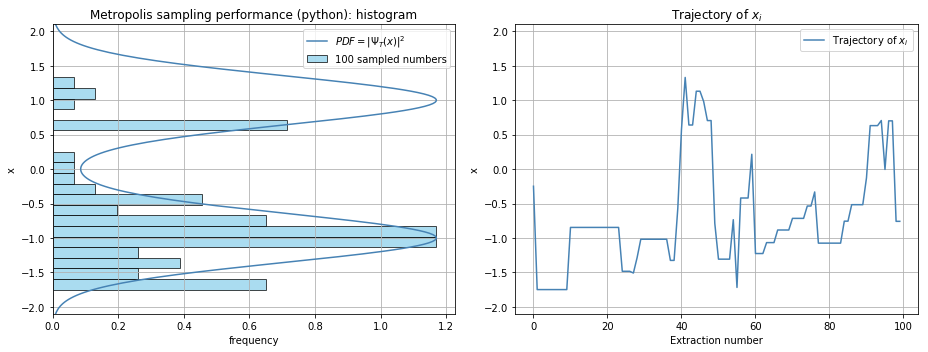

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# define the function psi_trial (up to a normalization constant, which is irrelevant) 
def trial_minimizer(x, m, s):
    return (np.exp(-(0.5 * (m - x)**2) / s**2) + np.exp(-(0.5 * (m + x)**2) / s**2))

# define the square modulus
def square_modulus(x, m, s):
    return trial_minimizer(x, m, s)**2

# define parameters of the trial function
m = 1 # mean (\mu)
s = 0.5 # standard deviation (\sigma)

# metropolis sampling idea (implemented here for reference, but also in C++)
q = 0 # starting point for metropolis
np.random.seed(1) # fix random seed for reproducibility
Q = [] # store the chain of point extracted
number_of_proposed_points = 10**2
accepted_moves = 0
width = 3. # width of uniform sampling centered in q

for j in range(number_of_proposed_points):
    proposed_move = ( q - 0.5*width + width*np.random.random_sample() )
    if np.random.random_sample() < min(1, square_modulus(proposed_move, m, s)/square_modulus(q, m, s)): # favour higher probability regions
        accepted_moves += 1 # update
        q = proposed_move # update
    ############################################
    # COMMENTED
    ############################################
    #if np.random.random_sample() <= 0.5: # give more symmetry
         #q = -q
    ############################################
    # COMMENTED
    ############################################
    Q.append(q) # save in a list
        
acceptance = accepted_moves / number_of_proposed_points
print('SAMPLING ACCORDING TO THE PDF:')
print(f'\tMetropolis acceptance = {acceptance*100.0}%')
print(f'\t{number_of_proposed_points} numbers sampled in total')

# plot details
x_values = np.linspace(-10, 10, 1000) # generate x values
y_values = square_modulus(x_values, m, s) # y is the square modulus of psi_trial

# Create a figure with two subplots
plt.figure(figsize=(13, 5))

# First subplot: histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
n, bins, patches = plt.hist(Q, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True, label=f'{number_of_proposed_points} sampled numbers', orientation='horizontal')
plt.plot(y_values * max(n), x_values, label='$PDF=|\Psi_T(x)|^2$', color='steelblue') # normalized to the maximum bin height
plt.title('Metropolis sampling performance (python): histogram')
plt.ylabel('x')
plt.xlabel('frequency')
plt.ylim(-2.1,2.1)
plt.grid(True)
plt.legend()

# Second subplot: trajectory of Q[i]
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(Q, label='Trajectory of $x_i$', color='steelblue')
plt.title('Trajectory of $x_i$')
plt.xlabel('Extraction number')
plt.ylabel('x')
plt.ylim(-2.1,2.1)
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Notice how a <font color="darkorange">random flip $q \mapsto -q$ with probability $1/2$</font> drastically improves the symmetry of the sampling, even with relatively few points. Proposing such a flip is reasonable, beacuse the positive and the negative values for $q$ are equally likely by symmetry of $|\Psi_T(q)|^2$.

SAMPLING ACCORDING TO THE PDF:
	Metropolis acceptance = 48.0%
	100 numbers sampled in total


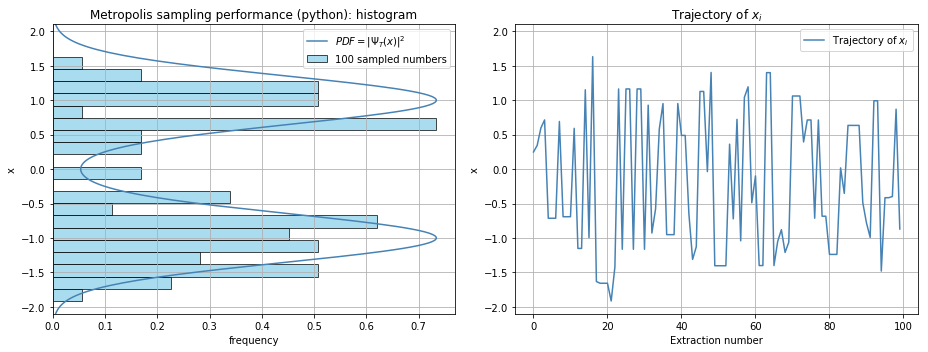

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# define the function psi_trial (up to a normalization constant, which is irrelevant) 
def trial_minimizer(x, m, s):
    return (np.exp(-(0.5 * (m - x)**2) / s**2) + np.exp(-(0.5 * (m + x)**2) / s**2))

# define the square modulus
def square_modulus(x, m, s):
    return trial_minimizer(x, m, s)**2

# define parameters of the trial function
m = 1 # mean (\mu)
s = 0.5 # standard deviation (\sigma)

# metropolis sampling idea (implemented here for reference, but also in C++)
q = 0 # starting point for metropolis
np.random.seed(1) # fix random seed for reproducibility
Q = [] # store the chain of point extracted
number_of_proposed_points = 10**2
accepted_moves = 0
width = 3. # width of uniform sampling centered in q

for j in range(number_of_proposed_points):
    proposed_move = ( q - 0.5*width + width*np.random.random_sample() )
    if np.random.random_sample() < min(1, square_modulus(proposed_move, m, s)/square_modulus(q, m, s)): # favour higher probability regions
        accepted_moves += 1 # update
        q = proposed_move # update
    ############################################
    # UNCOMMENTED
    ############################################
    if np.random.random_sample() <= 0.5: # give more symmetry
         q = -q
    ############################################
    # UNCOMMENTED
    ############################################
    Q.append(q) # save in a list
        
acceptance = accepted_moves / number_of_proposed_points
print('SAMPLING ACCORDING TO THE PDF:')
print(f'\tMetropolis acceptance = {acceptance*100.0}%')
print(f'\t{number_of_proposed_points} numbers sampled in total')

# plot details
x_values = np.linspace(-10, 10, 1000) # generate x values
y_values = square_modulus(x_values, m, s) # y is the square modulus of psi_trial

# Create a figure with two subplots
plt.figure(figsize=(13, 5))

# First subplot: histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
n, bins, patches = plt.hist(Q, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True, label=f'{number_of_proposed_points} sampled numbers', orientation='horizontal')
plt.plot(y_values * max(n), x_values, label='$PDF=|\Psi_T(x)|^2$', color='steelblue') # normalized to the maximum bin height
plt.title('Metropolis sampling performance (python): histogram')
plt.ylabel('x')
plt.xlabel('frequency')
plt.ylim(-2.1,2.1)
plt.grid(True)
plt.legend()

# Second subplot: trajectory of Q[i]
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(Q, label='Trajectory of $x_i$', color='steelblue')
plt.title('Trajectory of $x_i$')
plt.xlabel('Extraction number')
plt.ylabel('x')
plt.ylim(-2.1,2.1)
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Lastly, by using data blocking, the VMC code yields an <font color="darkorange">estimate of the energy functional</font>.

ARBITRARILY FIXED μ AND σ
	Energy estimate = -0.146629+-0.0043036
	Relative uncertainty = 2.9350264954408747%
	Total number of throws = 150000


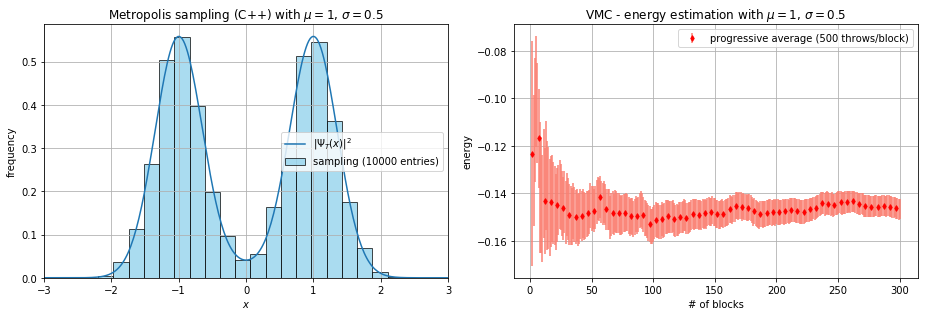

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# define the square modulus and its parameters
def square_modulus(x, m, s):
    return ((np.exp(-(0.5 * (m - x)**2) / s**2) + np.exp(-(0.5 * (m + x)**2) / s**2)))**2
m = 1  # mean (\mu)
s = 0.5  # standard deviation (\sigma)

# create canvas
plt.figure(figsize=(13, 4.5))

################### HISTOGRAM ##########################

# read data from file for histogram
with open('extracted.dat', 'r') as file:
    data = [float(line.strip()) for line in file]

# plot histogram and function
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(data, bins=20, edgecolor='black', color='skyblue', alpha=0.7, density=True, label=f'sampling ({len(data)} entries)')
x_values = np.linspace(-10, 10, 1000) # generate x values
y_values = square_modulus(x_values, m, s) # y is the square modulus of psi_trial
plt.plot(x_values, y_values * max(n), label='$|\Psi_T(x)|^2$')  # normalized to the maximum bin height
plt.xlabel('$x$')
plt.xlim(-3, 3)
plt.ylabel('frequency')
plt.title(f'Metropolis sampling (C++) with $\mu={m}$, $\sigma={s}$')
plt.legend()
plt.grid(True)

################### ENERGY #########################

# read data for scatter plot with errors
with open('sigma_ene_integr.dat', 'r') as file:
    errors = [float(line.strip()) for line in file]
with open('ave_ene_integr.dat', 'r') as file:
    ave_data = [float(line.strip()) for line in file]
x_blocks = np.arange(2, len(ave_data) + 2)
# must be priorly known
throws = 500
err = errors[-1]
mean_energy = ave_data[-1]
# scatter plot with error bars
plt.subplot(1, 2, 2)
plt.errorbar(x_blocks, ave_data, yerr=errors, fmt='d', markersize='4', markevery=5, color='red', ecolor='salmon', label=f'progressive average ({throws} throws/block)')
plt.xlabel('# of blocks')
plt.ylabel('energy')
plt.title(f'VMC - energy estimation with $\mu={m}$, $\sigma={s}$')
plt.legend()
plt.grid(True)

# print the estimate
print('ARBITRARILY FIXED \u03BC AND \u03C3')
print(f'\tEnergy estimate = {mean_energy}+-{err}')
print(f'\tRelative uncertainty = {abs(err/mean_energy)*100.}%')
print(f'\tTotal number of throws = {throws*x_blocks[-1]}')

##############################################################

# plot both
plt.tight_layout()
plt.show()

# <span style="color:darkorange"> 08.2: Parameters optimization </span>

The VMC algorithm used for finding the best suited $\mu$ and $\sigma$ is based on <font color="darkorange">simulated annealing</font> (SA), i.e. a concept borrowed from statistical physics, that guarantees equlibration towards the minimum energy configuration. The algorithm produces a <font color="darkorange">sequence</font> of configurations $\{\underline{a}_n \} = \{ \left(\mu_n,\sigma_n\right) \}$ <font color="darkorange">in the parameter space</font>, converging to the ideal one minimizing $E\left[\Psi_T\right]$. 

The scheme of SA is repeating Metropolis moves, roaming in the parameter space, while <font color="darkorange">temperature is lowered progressively</font>. Each couple of candidates is extracted uniformly from a rectangular neighbourhood, with sides $w_{\mu}\times w_{\sigma}$ and centered in $\left(\mu_{n},\sigma_{n}\right)$. Each Metropolis step of the SA requires to <font color="darkorange">compare the change in energy</font> associated to the proposal of new parameters $\left(\mu_{n+1},\sigma_{n+1}\right)$, since the probability of accepting the new set of parameters is:

$$
A\left(\left(\mu,\sigma\right)_{old} \rightarrow \left(\mu,\sigma\right)_{new}\right) =
\min \{ 1 , \exp\left( -\beta\left(E_{new}-E_{old}\right) \right) \} =
\min \{ 1 , \exp\left( -\beta\left(E\left[ \Psi^{\left(\mu_{n+1},\sigma_{n+1}\right)}_T \right]-E\left[ \Psi^{\left(\mu_{n},\sigma_{n}\right)}_T \right]\right) \right) \}.
$$

The cooling follows an <font color="darkorange">exponential decay</font> law, with a cooling factor $\gamma$, so that the number of temperature lowering steps $m$ required to go from $T_0$ to $T_f$ is:

$$ T_0 \gamma^m = T_f \quad \Rightarrow \quad m = \lceil \log\left(T_f/T_0\right) / \log\left(\gamma\right)  \rceil .$$


|        simulated annealing parameters         |        value          |
| ---------------: | :-------------------: |
| starting $\mu_0$ | $1.0$ |
| starting $\sigma_0$ | $0.5$ |
| $T_0$ | $5.0$ |
| $T_f$ | $0.01$ |
| $w_\mu$ |$0.25$|
| $w_\sigma$ |$0.25$|
| $\beta$ | $1/T$ |
| $\gamma$ | $0.95$ |
| SA block length $L$ | $500$ |
| integration points $N$ | $150000$ |

**Notes:** 

* $L$, i.e. the number of <font color="darkorange">moves</font> in the parameter space <font color="darkorange">at a given temperature</font>, should be large enough to allow both for a <font color="darkorange">burn-in period</font> of the Metropolis algorithm and for a <font color="darkorange">thorough exploration of the configuration space</font>;

* the number of <font color="darkorange">points</font> $N$ <font color="darkorange">for estimating</font> the <font color="darkorange">energy</font> functional $E\left[\Psi_T\right]$ should be large enough, so that the <font color="darkorange">uncertainty</font> of the measurement <font color="darkorange">is bounded</font> by a threshold, even more so that energy appears in an exponent; exercise **08.1** showed that $N=150000$ points lead to an uncertainty below 3%.

Consequently, the code running time may exceed 30 minutes. However, respecting the caveats presented makes <font color="darkorange">ergodicity</font> and <font color="darkorange">convergence</font> more likely.

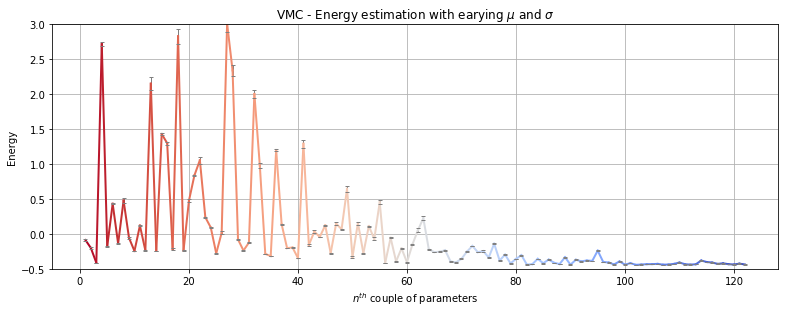

In [166]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 4.5))

with open('live_energy.dat', 'r') as file:
    e_sequence = [float(line.strip()) for line in file]
instant_t = np.arange(1, len(e_sequence) + 1)
with open('live_energy_error.dat', 'r') as file:
    errors = [float(line.strip()) for line in file]

# Define the range of n to map colors
n_values = np.arange(len(e_sequence))

# Create a colormap transitioning from warm to cold
cmap = plt.cm.coolwarm_r
normalize = plt.Normalize(vmin=n_values.min(), vmax=n_values.max())
scalar_map = plt.cm.ScalarMappable(norm=normalize, cmap=cmap)

# Plot each segment of the line with its corresponding color
for i in range(len(e_sequence) - 1):
    plt.plot(instant_t[i:i+2], e_sequence[i:i+2], color=scalar_map.to_rgba(n_values[i]), linewidth='2')

# Add error bars
plt.errorbar(instant_t, e_sequence, yerr=errors, fmt='none', ecolor='gray', elinewidth=1, capsize=2)

plt.xlabel('$n^{th}$ couple of parameters')
plt.ylabel('Energy')
plt.ylim(-0.5,3.0)
plt.title('VMC - Energy estimation with earying $\mu$ and $\sigma$')
plt.grid(True)

plt.show()

IDEAL PARAMETERS ACCORDING TO VMC - SA:
	μ = 0.84596
	σ = 0.623646


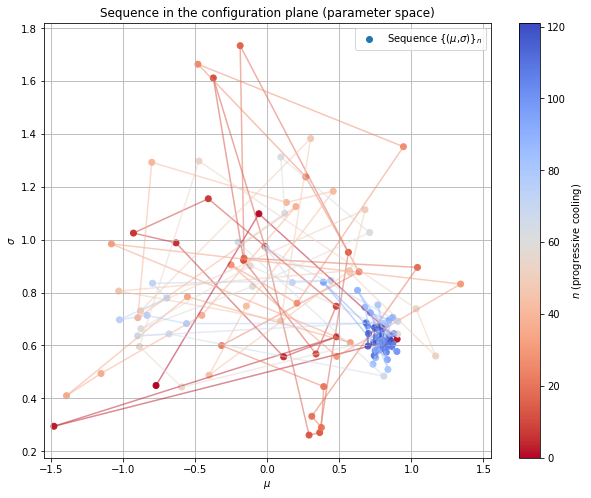

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load data from m_sequence.dat and s_sequence.dat
with open('live_m.dat', 'r') as f:
    m_sequence = np.loadtxt(f)  # Load m_sequence data

with open('live_s.dat', 'r') as f:
    s_sequence = np.loadtxt(f)  # Load s_sequence data
    
print('IDEAL PARAMETERS ACCORDING TO VMC - SA:')
print(f'\t\u03BC = {m_sequence[-1]}')
print(f'\t\u03C3 = {s_sequence[-1]}')

# Define the range of n to map colors
n_values = np.arange(len(m_sequence))  # Create an array of indices from 0 to len(m_sequence) - 1

# Create a reversed colormap
cmap = plt.get_cmap('coolwarm_r')  # Get the 'coolwarm' colormap, reversed
norm = Normalize(vmin=n_values.min(), vmax=n_values.max())  # Normalize the n_values to range between min and max
scalar_map = ScalarMappable(norm=norm, cmap=cmap)  # Create a scalar mappable to map n_values to colors

# Plot the sequence with lines connecting points
plt.figure(figsize=(10, 8))  # Create a new figure with specified size

# Plot individual line segments between consecutive points with fading colors
for i in range(len(m_sequence) - 1):
    plt.plot(m_sequence[i:i+2], s_sequence[i:i+2], color=scalar_map.to_rgba(n_values[i]), linestyle='-', alpha=0.5)

# Plot the points with colors mapped according to n_values
plt.scatter(m_sequence, s_sequence, c=n_values, cmap='coolwarm_r', label='Sequence {($\mu$,$\sigma$)}$_n$')

plt.xlabel('$\mu$')  # Label for x-axis
plt.ylabel('$\sigma$')  # Label for y-axis
#plt.ylim(0.4,0.8) # uncomment to zoom in on the convergence zone
plt.xlim(-1.55 , 1.55)
plt.title('Sequence in the configuration plane (parameter space)')  # Title of the plot
plt.colorbar(label='$n$ (progressive cooling)')  # Add colorbar indicating n values
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

## VMC SA - optimization results

Finally, the sampling according to $p(x)$ is now repeated, but using the set of <font color="darkorange">parameters yielded by the SA process</font>. The VMC estimation of the ground state energy is compared to the numerical solution obtained by diagonalization of the discretized problem.

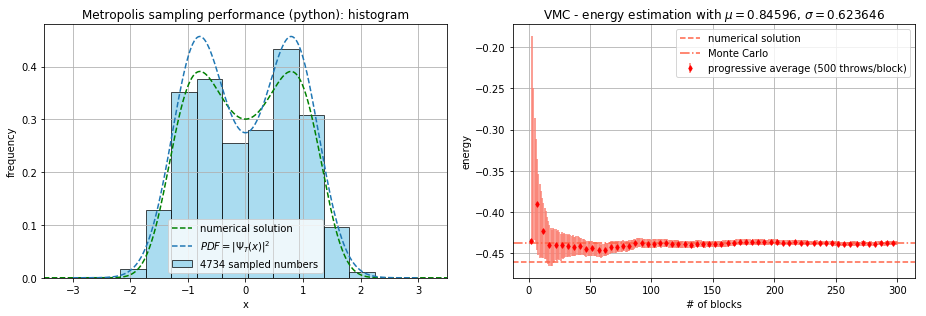

NUMERICAL SOLUTION (MATRIX):
	Ground state energy = -0.4604572093074068
SAMPLING AND ENERGY FUNCTIONAL (USING THE BEST VMC PARAMETERS):
	Metropolis acceptance = 47.339999999999996%
	4734 numbers sampled in total
	Energy estimate = -0.437456+-0.00249808
	Relative uncertainty = 0.5710471453129%
	Total number of throws = 150000
DISCREPANCY NUM-VMC: 
	9.207555125298944 sigmas


In [168]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

# define the function psi_trial (up to a normalization constant, which is irrelevant) 
def trial_minimizer(x, m, s):
    return (np.exp(-(0.5 * (m - x)**2) / s**2) + np.exp(-(0.5 * (m + x)**2) / s**2))
# define the square modulus
def square_modulus(x, m, s):
    return trial_minimizer(x, m, s)**2

# get the best parameters
with open('live_m.dat', 'r') as f:
    m_sequence = np.loadtxt(f)  # Load m_sequence data
with open('live_s.dat', 'r') as f:
    s_sequence = np.loadtxt(f)  # Load s_sequence data

# create canvas
plt.figure(figsize=(13, 4.5))
plt.subplot(1, 2, 1)

####################################################
################## F SHAPE #########################
####################################################

################### NUMERICAL SOLUTION ##########################

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 2000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
plt.plot(x, (psi[0])**2, label='numerical solution', color='green', linestyle='dashed' ) # normalized to the maximum bin height

########################################################
################### HISTOGRAM ##########################
########################################################

# define parameters of the trial function
m = m_sequence[-1] # mean (\mu)
s = s_sequence[-1] # standard deviation (\sigma)

# metropolis sampling idea (implemented here for reference, but also in C++)
q = 0 # starting point for metropolis
np.random.seed(1) # fix random seed for reproducibility
Q = [] # store the chain of point extracted
number_of_proposed_points = 10**4
accepted_moves = 0
width = 6. # width of uniform sampling centered in q

for j in range(number_of_proposed_points):
    proposed_move = ( q - 0.5*width + width*np.random.random_sample() )
    if np.random.random_sample() < min(1, square_modulus(proposed_move, m, s)/square_modulus(q, m, s)): # favour higher probability regions
        accepted_moves += 1 # update
        q = proposed_move # update
    if np.random.random_sample() <= 0.5: # give more symmetry
         q = -q
    Q.append(q) # save in a list
        
acceptance = accepted_moves / number_of_proposed_points

# plot details
x_values = np.linspace(-3, 3, 1000) # generate x values
y_values = square_modulus(x_values, m, s) # y is the square modulus of psi_trial
n, bins, patches = plt.hist(Q, bins=10, color='skyblue', edgecolor='black', alpha=0.7, density=True, label=f'{accepted_moves} sampled numbers')
plt.plot(x_values, y_values*max(n), label='$PDF=|\Psi_T(x)|^2$', linestyle='dashed') # normalized to the maximum bin height
plt.title('Metropolis sampling performance (python): histogram')
plt.xlabel('x')
plt.ylabel('frequency')
plt.xlim(-3.5, 3.5)
plt.grid(True)
plt.legend()

####################################################
################### ENERGY #########################
####################################################

# read data for scatter plot with errors
with open('sigma_ene_integr_VMC.dat', 'r') as file:
    errors = [float(line.strip()) for line in file]
with open('ave_ene_integr_VMC.dat', 'r') as file:
    ave_data = [float(line.strip()) for line in file]
x_blocks = np.arange(2, len(ave_data) + 2)
# must be priorly known
throws = 500
err = errors[-1]
mean_energy = ave_data[-1]
# scatter plot with error bars
plt.subplot(1, 2, 2)
plt.errorbar(x_blocks, ave_data, yerr=errors, fmt='d', markersize='4', markevery=5, color='red', ecolor='salmon', label=f'progressive average ({throws} throws/block)')
plt.axhline(y=E[0], color='tomato', label='numerical solution', ls='dashed' ) 
plt.axhline(y=mean_energy, color='tomato', label='Monte Carlo', ls='dashdot' ) 
plt.xlabel('# of blocks')
plt.ylabel('energy')
plt.title(f'VMC - energy estimation with $\mu={m}$, $\sigma={s}$')
plt.legend()
plt.grid(True)

# plot both
plt.tight_layout()
plt.show()

##############################################################

print('NUMERICAL SOLUTION (MATRIX):')
print(f'\tGround state energy = {E[0]}')

print('SAMPLING AND ENERGY FUNCTIONAL (USING THE BEST VMC PARAMETERS):')

print(f'\tMetropolis acceptance = {acceptance*100.0}%')
print(f'\t{accepted_moves} numbers sampled in total')

# print the estimate
print(f'\tEnergy estimate = {mean_energy}+-{err}')
print(f'\tRelative uncertainty = {abs(err/mean_energy)*100.}%')
print(f'\tTotal number of throws = {throws*x_blocks[-1]}')

print(f'DISCREPANCY NUM-VMC: \n\t{abs(-mean_energy+E[0])/(err)} sigmas')